In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries
from pandas.api.types import CategoricalDtype
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, mean_squared_error, average_precision_score, confusion_matrix, f1_score, precision_score, precision_recall_curve, recall_score
from sklearn.metrics import roc_curve, mean_absolute_error, r2_score, classification_report, plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from IPython.display import Image  
import graphviz 
import pydotplus
import seaborn as sns        

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import joblib

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn import metrics

pd.set_option('display.max_columns', None)

#Setting warning filters
import warnings

# **Data preparation**

In [ ]:
df = pd.read_csv('/content/OnlineNewsPopularity.csv')                                 
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10316.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000
mean,636.208317,9.764541,487.476638,0.561105,0.992148,0.704302,9.990597,3.337146,3.494281,1.222179,4.628100,7.134354,0.071830,0.158007,0.176037,0.077743,0.220240,0.135227,99.884828,1255.549297,440.942182,7744.028599,495856.752302,154178.168532,859.663012,4967.169244,2768.570741,3183.328163,7666.957441,4828.840529,0.168396,0.181483,0.192632,0.183713,0.145225,0.059719,0.068832,0.128551,0.199755,0.149300,0.175051,0.210400,0.265494,0.454909,0.134535,0.043487,0.016583,0.719789,0.272165,0.362246,0.098720,0.767819,-0.255046,-0.489713,-0.113443,0.272804,0.081781,0.348230,0.152282,3304.013379
std,57.400255,1.966246,408.812221,0.119334,0.088267,0.121728,10.408161,4.407716,7.682986,4.365253,0.496900,1.880373,0.258219,0.364765,0.380870,0.267780,0.414429,0.341982,106.036613,2811.335854,447.362238,46507.903693,294124.768170,122532.737128,1066.736198,5216.538923,1138.136961,19441.695067,37485.810823,23198.027082,0.374235,0.385437,0.394386,0.387269,0.352345,0.236977,0.253180,0.334718,0.272366,0.228742,0.257700,0.286468,0.308758,0.095875,0.098668,0.017166,0.011373,0.162983,0.151530,0.091508,0.070981,0.225569,0.126758,0.277758,0.098674,0.323743,0.260705,0.187500,0.226856,14320.624203
min,535.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018191,0.018182,0.018182,0.018182,0.018182,0.000000,-0.377657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,586.000000,8.000000,223.000000,0.488150,1.000000,0.642668,4.000000,1.000000,0.000000,0.000000,4.470216,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,462.000000,292.200000,0.000000,69100.000000,36018.750000,0.000000,3332.169110,2160.459801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025251,0.025083,0.025077,0.025724,0.028663,0.403282,0

In [ ]:
df.shape

(10316, 61)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10316 entries, 0 to 10315
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             10316 non-null  object 
 1    timedelta                      10316 non-null  float64
 2    n_tokens_title                 10316 non-null  float64
 3    n_tokens_content               10316 non-null  float64
 4    n_unique_tokens                10316 non-null  float64
 5    n_non_stop_words               10316 non-null  float64
 6    n_non_stop_unique_tokens       10316 non-null  float64
 7    num_hrefs                      10316 non-null  float64
 8    num_self_hrefs                 10316 non-null  float64
 9    num_imgs                       10316 non-null  float64
 10   num_videos                     10316 non-null  float64
 11   average_token_length           10316 non-null  float64
 12   num_keywords                   

In [ ]:
df.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              1
 title_sentiment_polarity        1
 abs_title_subjectivity          1
 abs_title_sentiment_polarity    1
 shares                          1
Length: 61, dtype: int64

In [ ]:
df.dropna(inplace=True)

(array([1.0301e+04, 7.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([4.000000e+00, 8.433360e+04, 1.686632e+05, 2.529928e+05,
        3.373224e+05, 4.216520e+05, 5.059816e+05, 5.903112e+05,
        6.746408e+05, 7.589704e+05, 8.433000e+05]),
 <a list of 10 Patch objects>)

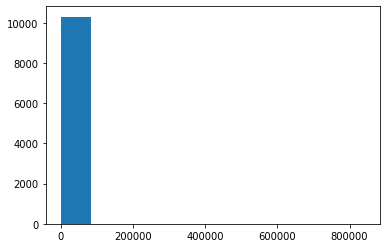

In [ ]:
counts, bins = np.histogram(df[' shares'])

plt.hist(bins[:-1], bins, weights=counts)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f278d77bbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f278d780690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f278d77b690>],
 'medians': [<matplotlib.lines.Line2D at 0x7f278d787190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f278d7876d0>],
 'means': []}

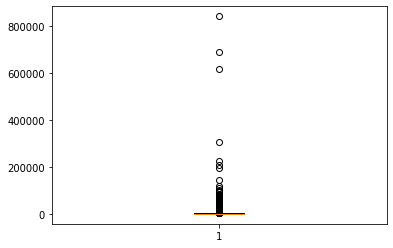

In [ ]:
plt.boxplot(df[' shares']) 

The 75% of the samples have shares lower than 2800 and from the graphs above, there are some outliers with shares, so we excluded the samples with shares more than 30000.


In [ ]:
#df1=df[df[' shares']<3000]
#df1.describe()
df1 = df

In [ ]:
df2=df1.drop(['url',' timedelta'],axis=1) # deleteing unnessary columns

In [ ]:
df2[' shares'].median()
df2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [ ]:
# Dividing the shares into 2 types by median to create the classification machine learnining model

def assign_y(row):
  if row[' shares']<=1400:
    y=0
  else :
    y=1 
  return y

df3 = df2
df3['y'] = df3.apply (lambda row: assign_y(row), axis=1)
df4 = df3.drop([' shares'],axis=1)

df4.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,y
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [ ]:
print('Raw: ', df.shape)
print('Cleaned: ', df4.shape)

Raw:  (10315, 61)
Cleaned:  (10315, 59)


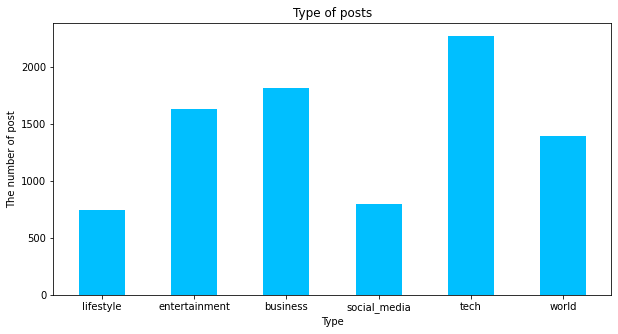

In [ ]:
lifestyle = sum(df4[' data_channel_is_lifestyle'])
entertainment = sum(df4[' data_channel_is_entertainment'])
business = sum(df4[' data_channel_is_bus'])
social_media = sum(df4[' data_channel_is_socmed'])
tech = sum(df4[' data_channel_is_tech'])
world = sum(df4[' data_channel_is_world'])
other = df4[df4[' data_channel_is_lifestyle'] == 0]
post_type = {'lifestyle': lifestyle, 'entertainment': entertainment, 'business': business, 'social_media': social_media, 'tech': tech, 'world': world}

df = df[df[' n_tokens_content'] != 0]

pt = list(post_type.keys())
values = list(post_type.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(pt, values, color ='deepskyblue', width = 0.5)
 
plt.xlabel("Type")
plt.ylabel("The number of post")
plt.title("Type of posts")
plt.show()

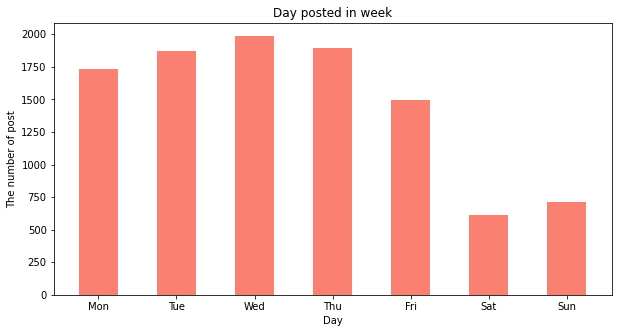

In [ ]:
Mon = sum(df4[' weekday_is_monday'])
Tue = sum(df4[' weekday_is_tuesday'])
Wed = sum(df4[' weekday_is_wednesday'])
Thu = sum(df4[' weekday_is_thursday'])
Fri = sum(df4[' weekday_is_friday'])
Sat = sum(df4[' weekday_is_saturday'])
Sun = sum(df4[' weekday_is_sunday'])

Day = {'Mon': Mon, 'Tue': Tue, 'Wed': Wed, 'Thu': Thu, 'Fri': Fri, 'Sat': Sat, 'Sun': Sun}



days = list(Day.keys())
values = list(Day.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(days, values, color ='salmon', width = 0.5)
 
plt.xlabel("Day")
plt.ylabel("The number of post")
plt.title("Day posted in week")
plt.show()

In [ ]:
Y=df4['y'].values
X=df4[df4.columns.drop(['y'])].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state=123) # 70% training and 30% test

In [ ]:
df4['y'].value_counts()

1    5423
0    4892
Name: y, dtype: int64

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, max_features=None, 
                             )
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53      1468
           1       0.58      0.59      0.59      1627

    accuracy                           0.56      3095
   macro avg       0.56      0.56      0.56      3095
weighted avg       0.56      0.56      0.56      3095



In [ ]:
param_grid = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],'max_features':["auto", "sqrt", "log2"]}

In [ ]:
clf=DecisionTreeClassifier()
dtree_gscv = GridSearchCV(clf, param_grid, cv=5)
dtree_gscv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [ ]:
dtree_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=10, max_features='sqrt', 
                             )
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       splitter='random')

In [ ]:
pred=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.49      0.54      1468
           1       0.60      0.70      0.65      1627

    accuracy                           0.60      3095
   macro avg       0.60      0.60      0.59      3095
weighted avg       0.60      0.60      0.60      3095



# **Machine learning classification**

## **Baseline model: Logistic Regresstion**

In [ ]:
logistic = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
logistic.fit(X_train, y_train)
logistic_ypred = logistic.predict(X_test)
print('The accuracy of logistic regression for training dataset is ', logistic.score(X_train, y_train))
print('The accuracy of logistic regression for testing dataset is ', logistic.score(X_test, y_test))

The accuracy of logistic regression for training dataset is  0.5957477477477477
The accuracy of logistic regression for testing dataset is  0.6019841937111149


In [ ]:
logistic.predict_proba(X_test)

array([[0.62847126, 0.37152874],
       [0.42623035, 0.57376965],
       [0.64091244, 0.35908756],
       ...,
       [0.5543943 , 0.4456057 ],
       [0.48531542, 0.51468458],
       [0.41048822, 0.58951178]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


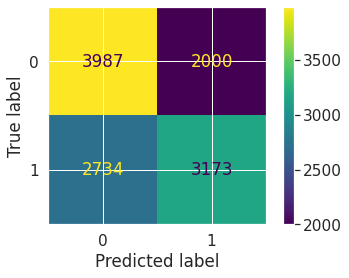

In [ ]:
plot_confusion_matrix(logistic, X_test, y_test)

In [ ]:
print(classification_report(y_test, logistic_ypred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63      5987
           1       0.61      0.54      0.57      5907

    accuracy                           0.60     11894
   macro avg       0.60      0.60      0.60     11894
weighted avg       0.60      0.60      0.60     11894



In [ ]:
# Tunning
'''
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

# Best: 0.648324 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
# Model after tuning
logistic_t = LogisticRegression(C = 1.0, solver='newton-cg', penalty = 'l2', random_state=0)
logistic_t.fit(X_train, y_train)
logistic_ypred_t = logistic_t.predict(X_test)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

In [ ]:
print(classification_report(y_test, logistic_ypred_t))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65      5987
           1       0.65      0.62      0.63      5907

    accuracy                           0.64     11894
   macro avg       0.64      0.64      0.64     11894
weighted avg       0.64      0.64      0.64     11894



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


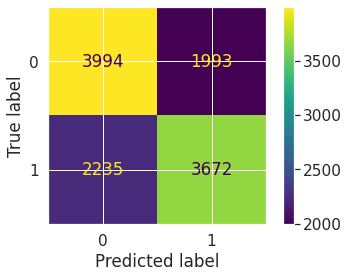

In [ ]:
plot_confusion_matrix(logistic_t, X_test, y_test)

## **Main model: XGboost**

In [ ]:
m_xgboost = XGBClassifier(objective ='binary:logistic', max_depth=5, n_estimators=100)
m_xgboost

XGBClassifier(max_depth=5)

In [ ]:
kfold = KFold()
# Perform K-Fold Cross Validation
results = cross_val_score(m_xgboost, X_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 66.62% (0.48%)


In [ ]:
m_xgboost.fit(X_train, y_train)

XGBClassifier(max_depth=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


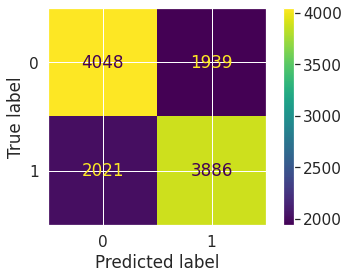

In [ ]:
xg_ypred = m_xgboost.predict(X_test, ntree_limit=300)
plot_confusion_matrix(m_xgboost, X_test, y_test)

In [ ]:
# Get the classification report
print(classification_report(y_test, xg_ypred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      5987
           1       0.67      0.66      0.66      5907

    accuracy                           0.67     11894
   macro avg       0.67      0.67      0.67     11894
weighted avg       0.67      0.67      0.67     11894



In [ ]:
col = df4.columns.drop(['y'])
importance = list(m_xgboost.feature_importances_)
fea_dfxc = pd.DataFrame({'columns':col,'importance':importance})
fea_dfxc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfxc.reset_index(drop=True,inplace=True)
# display(fea_dfxc)
fea_dfxc.head()

,columns,importance
0,data_channel_is_entertainment,0.107246
1,data_channel_is_tech,0.059235
2,data_channel_is_socmed,0.053718
3,kw_avg_avg,0.052652
4,is_weekend,0.051650


In [ ]:
# Tunning
'''
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))'''
# Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}
# Lowest RMSE:  0.4570079711754792

In [ ]:
# Model after tunning
m_xgboost_t = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.1, learning_rate = 0.05, max_depth = 6, n_estimators = 1000)
m_xgboost_t.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.1, learning_rate=0.05, max_depth=6,
              n_estimators=1000)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


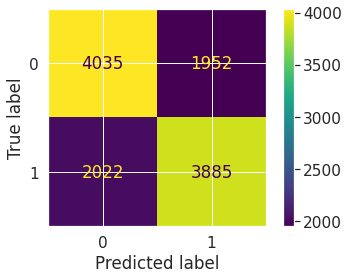

In [ ]:
xg_ypred_t = m_xgboost_t.predict(X_test, ntree_limit=300)
plot_confusion_matrix(m_xgboost_t, X_test, y_test)

In [ ]:
print(classification_report(y_test, xg_ypred_t))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      5987
           1       0.67      0.66      0.66      5907

    accuracy                           0.67     11894
   macro avg       0.67      0.67      0.67     11894
weighted avg       0.67      0.67      0.67     11894



In [ ]:
col = df4.columns.drop(['y'])
importance = list(m_xgboost_t.feature_importances_)
fea_dfxc = pd.DataFrame({'columns':col,'importance':importance})
fea_dfxc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfxc.reset_index(drop=True,inplace=True)
# display(fea_dfxc)
fea_dfxc.head()

,columns,importance
0,is_weekend,0.079857
1,data_channel_is_entertainment,0.073861
2,data_channel_is_socmed,0.067799
3,weekday_is_saturday,0.067609
4,data_channel_is_world,0.050958


## **SVM**

In [ ]:
print(type(y_train))
import numpy.core.defchararray as np_f
y_train1 = y_train.astype(str)
y_test1 = y_test.astype(str)

y_train_svm = np_f.replace(y_train1, '0', '-1')
y_test_svm = np_f.replace(y_test1, '0', '-1')

<class 'numpy.ndarray'>


In [ ]:
linear_svm=svm.SVC(kernel='linear', C = 100)
linear_svm.fit(X_train, y_train_svm)
svm_pred = linear_svm.predict(X_test)

In [ ]:
predicted_linear_svm=linear_svm.predict(X_test)
print("accuracy",accuracy_score(y_test_svm, predicted_linear_svm))
plot_confusion_matrix(linear_svm, X_test, y_test_svm)

print("Classification Report \n", classification_report(y_test_svm, svm_pred))

In [ ]:
print("Accuracy:",accuracy_score(y_test_svm, predicted_linear_svm))
print('Precision: %.3f' % precision_score(y_test_svm, predicted_linear_svm))
print('Recall: %.3f' % recall_score(y_test_svm, predicted_linear_svm))
print('F1 Score: %.3f' % f1_score(y_test_svm, predicted_linear_svm))

In [ ]:
# Tunning
model = SVC()
kernel = ['linear']
#kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.01, 0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001]
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Model after tunning
linear_svm_t=svm.SVC(kernel='linear', C = , gamma = )
linear_svm_t.fit(X_train, y_train)
svm_pred_t = linear_svm_t.predict(X_test)

In [ ]:
predicted_linear_svm_t=linear_svm_t.predict(X_test)
print("accuracy",accuracy_score(y_test, predicted_linear_svm_t))
plot_confusion_matrix(linear_svm_t, X_test, y_test)

print("Classification Report \n", classification_report(y_test, svm_pred_t))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train, y_train)

 
# **Naïve Bayes**


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
naive_class=GaussianNB()
naive_class.fit(X_train, y_train)
naive_class_pred = naive_class.predict(X_test)

In [ ]:
print(accuracy_score(y_test,naive_class_pred))
print(f1_score(y_test,naive_class_pred,average=None))

0.5266520934925172
[0.66952336 0.16617299]


In [ ]:
model = GaussianNB()
cv_scores = cross_val_score(model, X, Y, cv=5)

In [ ]:
print("Accuracy:",accuracy_score(y_test, naive_class_pred))
print('Precision: %.3f' % precision_score(y_test, naive_class_pred))
print('Recall: %.3f' % recall_score(y_test, naive_class_pred))
print('F1 Score: %.3f' % f1_score(y_test, naive_class_pred))

Accuracy: 0.5266520934925172
Precision: 0.664
Recall: 0.095
F1 Score: 0.166


In [ ]:
data = confusion_matrix(y_test,naive_class_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

NameError: ignored

In [ ]:
print(classification_report(y_test, naive_class_pred))

              precision    recall  f1-score   support

           0       0.52      0.95      0.67      5987
           1       0.66      0.09      0.17      5907

    accuracy                           0.53     11894
   macro avg       0.59      0.52      0.42     11894
weighted avg       0.59      0.53      0.42     11894



In [ ]:
Model.append('Naive')
Accuracy.append(accuracy_score(y_test,naive_class_pred))
F1Score.append(f1_score(y_test,naive_class_pred,average=None))

AttributeError: ignored

**Hyperparameter Tuning**

In [ ]:
np.logspace(0,-9, num=10)

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test);

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])

results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

In [ ]:
#model after tuning
naive_class_t=gs_NB
naive_class_t.fit(X_train, y_train)
naive_class_pred_t = naive_class_t.predict(X_test)

In [ ]:
print(accuracy_score(y_test,naive_class_pred_t))
print(f1_score(y_test,naive_class_pred_t,average=None))

In [ ]:
data = confusion_matrix(y_test,naive_class_pred_t)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_test, naive_class_pred_t))

# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
print(accuracy_score(y_test,knn_pred))
print(f1_score(y_test,knn_pred,average=None))

In [ ]:
data = confusion_matrix(y_test,knn_pred)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_test, knn_pred))

In [ ]:
Model.append('KNN')
Accuracy.append(accuracy_score(y_test,knn_pred))
F1Score.append(f1_score(y_test,knn_pred,average=None))

**Hyperparameter tunning**

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

In [ ]:
# find the best score
g_res.best_score_

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
#Model after tuning
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_knn))
print(f1_score(y_test,y_knn,average=None))

In [ ]:
data = confusion_matrix(y_test,y_knn)
calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [ ]:
print(classification_report(y_test, knn_pred))